<html>
<head>
	<title></title>
</head>
<body>
<h2 style="text-align: center;line-height: 120%;">ФЕДЕРАЛЬНОЕ ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ ОБРАЗОВАТЕЛЬНОЕ УЧРЕЖДЕНИЕ ВЫСШЕГО ОБРАЗОВАНИЯ НАЦИОНАЛЬНЫЙ ИССЛЕДОВАТЕЛЬСКИЙ УНИВЕРСИТЕТ «МОСКОВСКИЙ ЭНЕРГЕТИЧЕСКИЙ ИНСТИТУТ» Кафедра «РЗиАЭ»</h2>
<h2 style="text-align: center;line-height: 20%;">Лабораторная работа №3</h2>

<h3 style="text-align: center;line-height: 80%;"><em>Решающее дерево. Композиции решающих деревьев. Многослойный перцептрон</em></h3>

<p style="text-align: right;line-height: 40%;">Выполнил: студент группы Э-13м-19</p>

<p style="text-align: right;line-height: 40%;">Шмыков А.Д.</p>

<p style="text-align: right;line-height: 40%;">Проверил: Нухулов С.М.</p>
<h4 style="text-align: center;line-height: 100%;"><em> Москва, 2020</em></h3>
</body>
</html>

<h3> П1. Импорт библиотек. </h3>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from tensorflow.python.keras.utils import np_utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.python.keras.utils import np_utils
from tensorflow.keras.datasets import mnist
from sklearn.preprocessing import StandardScaler
def graph(range_,f1_train,f1_test,name):
    plt.figure(figsize = [10,5])
    plt.plot(range_, f1_train)
    plt.plot(range_, f1_test)
    plt.legend(['f1train','f1test'])
    plt.grid('on')
    plt.xlabel(name)
    plt.ylabel('metric')
def neuron_summary(X_train,y_train):
    NB_CLASSES = y_train.shape[1]
    INPUT_SHAPE = (X_train.shape[1],)
    model = Sequential()
    model.add(Dense(32, input_shape=INPUT_SHAPE))
    model.add(Activation('relu'))
    model.add(Dropout(0.3))
    model.add(Dense(16))
    model.add(Activation('relu'))
    model.add(Dense(8))
    model.add(Activation('relu'))
    model.add(Dense(NB_CLASSES))
    model.add(Activation('softmax'))
    model.summary()
    

<h3> П2.1 Загрузка анализируемых данных csv и подсчёт пропущенных значений. </h3>

In [16]:
data=pd.read_csv(r"C:\Users\1\Downloads\income.csv")

# for row in range(df.values.shape[0]):
#     for col in range(df.values.shape[1]):
#         if  not isinstance(df.values[row,col], int) and df.values[row,col][0]==' ':
#             df.values[row,col]= df.values[row,col][1:]
data.replace(' ?', np.NaN, inplace=True)
print(data.isnull().sum())
data['workclass'].fillna(data['workclass'].mode()[0], inplace=True)
data['occupation'].fillna(data['occupation'].mode()[0], inplace=True)
data['native_country'].fillna(data['native_country'].mode()[0], inplace=True)
data

age                  0
workclass         1835
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
income               0
dtype: int64


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


<h3> П2.2 Построить гистограмму объектов по признаку «workclass» </h3>


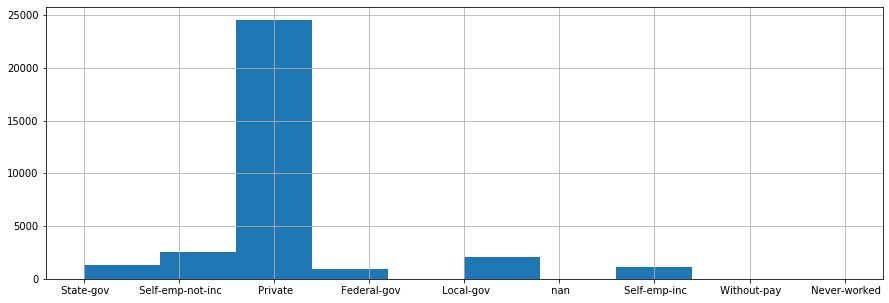

In [3]:
data['workclass'].hist(figsize=(15,5))

<h3> П2.3 Визуализировать совмещенные гистограммы объектов по
признаку «income» для двух значений признака «sex» на одном графике.</h3>

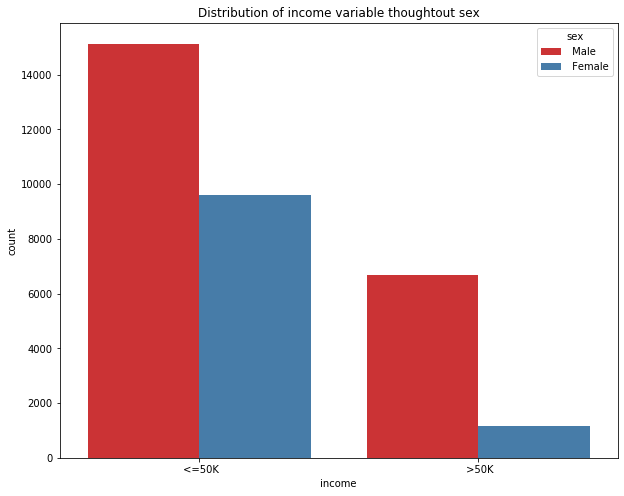

In [4]:
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.countplot(x="income", hue="sex", data=data, palette="Set1")
ax.set_title("Distribution of income variable thoughtout sex")
plt.show()

<h3> П2.4 Визуализировать совмещенные гистограммы объектов по
признаку «income» для всех значений признака «race» на одном графике.</h3>

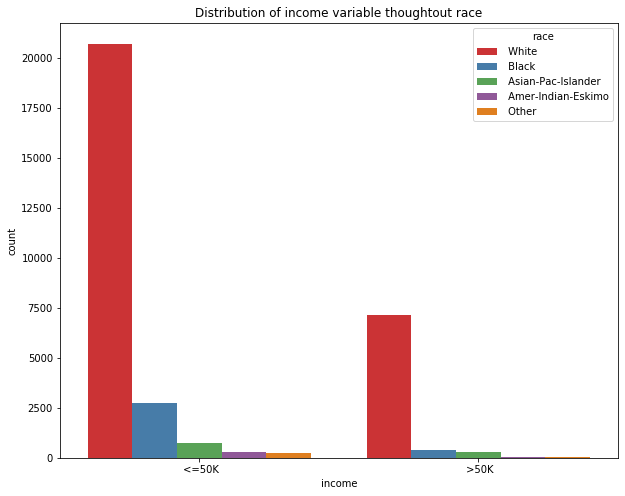

In [5]:
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.countplot(x="income", hue="race", data=data, palette="Set1")
ax.set_title("Distribution of income variable thoughtout race")
plt.show()

<h3> П2.5 Визуализировать совмещенные гистограммы объектов по
признаку «workclass» для двух значений признака «income» на одном.</h3>

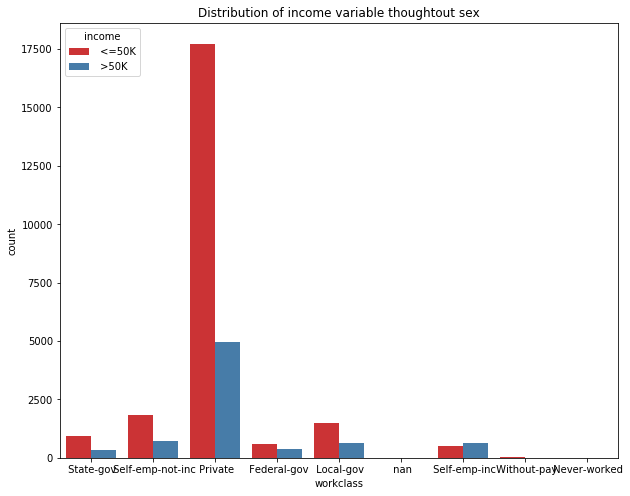

In [38]:
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.countplot(x="workclass", hue="income", data=data, palette="Set1")
ax.set_title("Distribution of income variable thoughtout workclass")
plt.show()

<h3> П2.6 Визуализировать совмещенные гистограммы объектов по
признаку «workclass» для двух значений признака «sex» на одном.</h3>

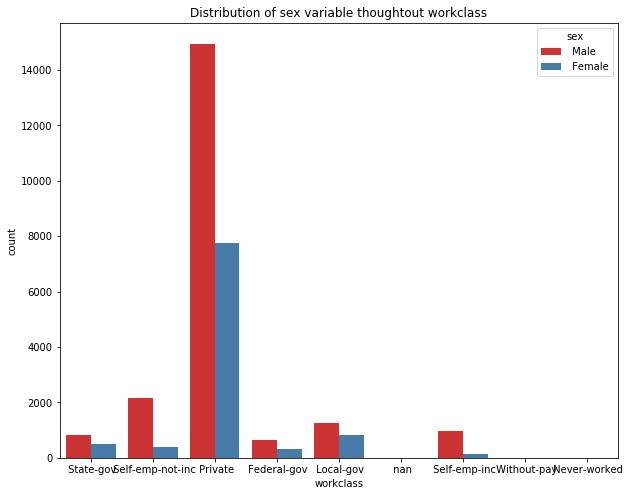

In [39]:
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.countplot(x="workclass", hue="sex", data=data, palette="Set1")
ax.set_title("Distribution of sex variable thoughtout workclass")
plt.show()


<h3> П2.7 Визуализировать гистограмму объектов по признаку «age»;</h3>

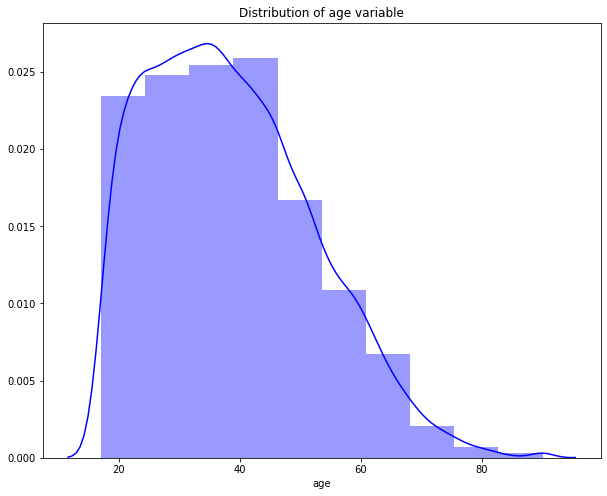

In [40]:
f, ax = plt.subplots(figsize=(10,8))
x = data['age']
ax = sns.distplot(x, bins=10, color='blue')
ax.set_title("Distribution of age variable")
plt.show()


<h3> П2.8 Визуализировать распределение объектов по признаку «age»,
используя «ящик с усами»</h3>

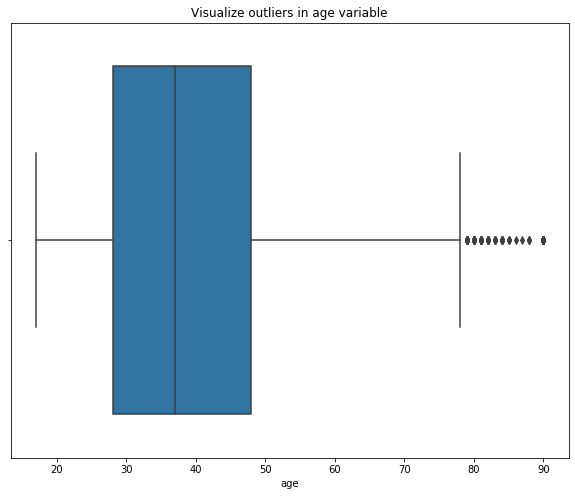

In [5]:
f, ax = plt.subplots(figsize=(10,8))
x = data['age']
ax = sns.boxplot(x)
ax.set_title("Visualize outliers in age variable")
plt.show()

<h3> П2.9 Визуализировать два «ящика с усами» по признаку «age» для
двух значений признака «income» на одном графике;</h3>

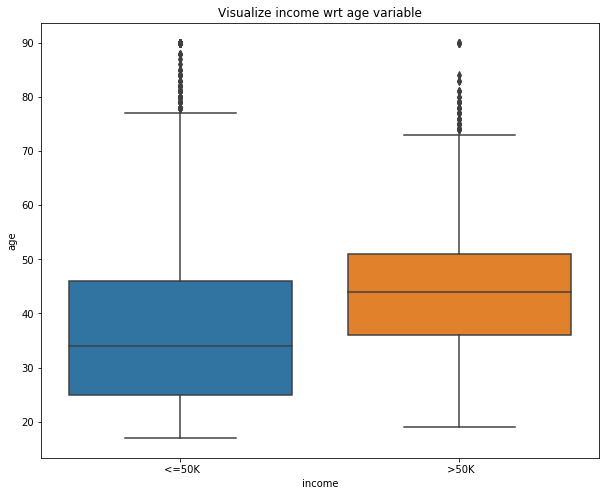

In [6]:
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.boxplot(x="income", y="age", data=data)
ax.set_title("Visualize income wrt age variable")
plt.show()

<h3> П2.10 Визуализировать четыре «ящика с усами» по признаку «age»
для двух значений признака «income» и двух значений признака «sex» на
одном графике.</h3>

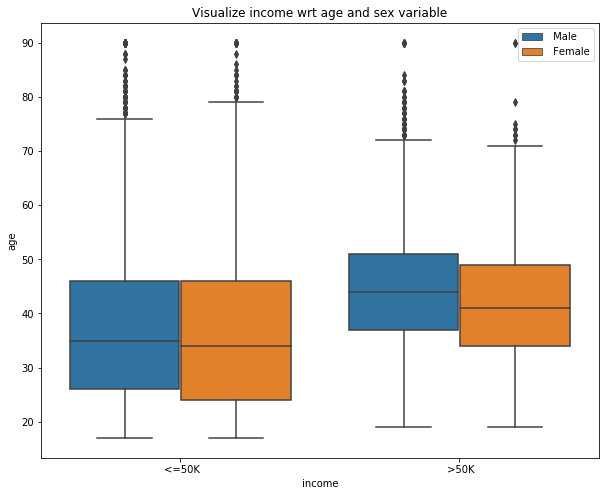

In [7]:
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.boxplot(x="income", y="age", hue="sex", data=data)
ax.set_title("Visualize income wrt age and sex variable")
ax.legend(loc='upper right')
plt.show()

<h3> П2.11 визуализировать «ящики с усами» для каждого из значений
признака «race» по признаку «аge»;</h3>

Задача SVM максимизировать зазор, разделяющий классы. Ширина зазора считается по формуле:
![Ttile](https://imgur.com/QM9UHgm.png)


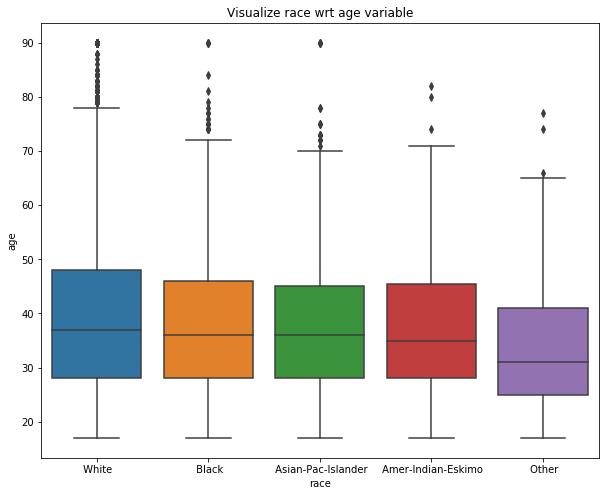

In [80]:
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.boxplot(x="race", y="age", data=data)
ax.set_title("Visualize race wrt age variable")
plt.show()

<h3> П2.12 визуализировать тепловую карту корреляции признаков;</h3> 


In [6]:
data.corr().style.format("{:.4}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
age,1.0,-0.07665,0.03653,0.07767,0.05777,0.06876
fnlwgt,-0.07665,1.0,-0.04319,0.0004319,-0.01025,-0.01877
education_num,0.03653,-0.04319,1.0,0.1226,0.07992,0.1481
capital_gain,0.07767,0.0004319,0.1226,1.0,-0.03162,0.07841
capital_loss,0.05777,-0.01025,0.07992,-0.03162,1.0,0.05426
hours_per_week,0.06876,-0.01877,0.1481,0.07841,0.05426,1.0


<h3> П2.14 определить категориальные признаки в наборе данных.</h3>

In [17]:
from category_encoders import TargetEncoder
data['income']=pd.get_dummies(data['income'])

categorical = [var for var in data.columns if data[var].dtype=='O' or data[var].dtype=='uint8' ]
data[categorical].head(10)
encoder = TargetEncoder()
data[categorical] = encoder.fit_transform(data[categorical], data['income'])
data

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,0.728043,77516,0.585247,13,0.954039,0.865517,0.896930,0.74414,0.694263,2174,0,40,0.754075,1
1,50,0.715073,83311,0.585247,13,0.553152,0.515986,0.551429,0.74414,0.694263,0,0,13,0.754075,1
2,38,0.789939,215646,0.840491,9,0.895791,0.937226,0.896930,0.74414,0.694263,0,0,40,0.754075,1
3,53,0.789939,234721,0.948936,7,0.553152,0.937226,0.551429,0.87612,0.694263,0,0,40,0.754075,1
4,28,0.789939,338409,0.585247,13,0.553152,0.657363,0.524872,0.87612,0.890539,0,0,40,0.736842,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,0.789939,257302,0.751640,12,0.553152,0.695043,0.524872,0.74414,0.890539,0,0,38,0.754075,1
32557,40,0.789939,154374,0.840491,9,0.553152,0.875125,0.551429,0.74414,0.694263,0,0,40,0.754075,0
32558,58,0.789939,151910,0.840491,9,0.914401,0.865517,0.936738,0.74414,0.890539,0,0,40,0.754075,1
32559,22,0.789939,201490,0.840491,9,0.954039,0.865517,0.986780,0.74414,0.694263,0,0,20,0.754075,1


<h3>П2.15 определить числовые признаки в наборе данных.</h3> 

In [8]:
numerical = [var for var in data.columns if data[var].dtype=='int64']
data[numerical].head()


,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40


<h3>П3. Подготовить и разделить исходный набор данных на тренировочный и тестовый наборы, в качестве целевой переменной возьмите признак «income».</h3> 

In [18]:
X = data.drop(columns=['income'])
y = data['income']
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.3, shuffle=True)


<h3>П4. Обучить модель решающего дерева для задачи классификации, построить графики зависимости F-меры на обучающей выборке и на тестовой от глубины дерева. Найти оптимальную глубину дерева, варьируя ее в выбранном диапазоне. Построить для оптимальной модели матрицу ошибок.</h3> 

max_depth - ограничение глубины дерева для уменьшения переобучения (pre-pruning)

С увеличением глубины уменьшается выборка ближе к листьям, так как важные решения(отнесение к классу) находятся в листьях, то увеличивается нестабильность.

Best depth is  8


,predicted income<50,predicted income>50
actual income<50,1275,1081
actual income>50,319,7094


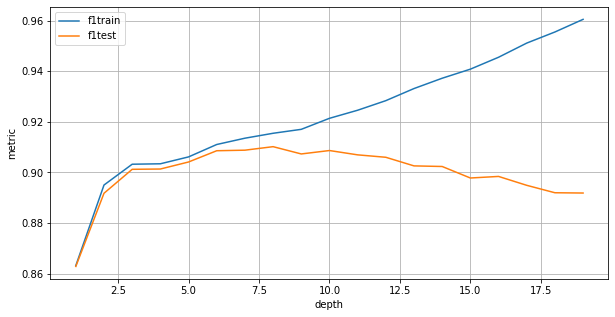

In [10]:
from sklearn.metrics import f1_score,confusion_matrix,accuracy_score
depth_range = np.arange(1, 20, 1) 
f1_train=[]
f1_test=[]

for depth in depth_range:
    tree = DecisionTreeClassifier(max_depth=depth, random_state=0)
    tree.fit(X_train,y_train)
    y_pred=tree.predict(X_test)
    y_pred_train=tree.predict(X_train)
    f1_test.append(f1_score(y_test,y_pred))
    f1_train.append(f1_score(y_train,y_pred_train))
graph(depth_range,f1_train,f1_test,"depth")
best_depth=depth_range[f1_test.index(max(f1_test))]
print("Best depth is ",best_depth)
model = DecisionTreeClassifier(max_depth=best_depth, random_state=0) 
model.fit(X_train, y_train)
confusion_matrix = confusion_matrix(y_test, model.predict(X_test)) 
pd.DataFrame(data  =  confusion_matrix,  columns  =  ['predicted  income<50', 
'predicted income>50'], index = ['actual income<50', 'actual income>50'])


<h3>П5. Обучить модель случайного леса для задачи классификации.</h3> 

n_estimators - количество деревьев в лесу.

Cлучайный лес — это бэггинг над решающими деревьями, при обучении которых для каждого разбиения признаки выбираются из некоторого случайного подмножества признаков. Практически не чувствителен к выбросам в данных из-за случайного сэмлирования
![Ttile](https://imgur.com/1e8WFbH.png)

Усреднение результатов по большему количеству деревьев позволит получить более устойчивый ансамбль за счет снижения переобучения. Однако  обратная сторона увеличения числа деревьев заключается в том, что с ростом количества деревьев требуется больше памяти и больше времени для обучения

Best number of trees is  15


,predicted income<50,predicted income>50
actual income<50,1494,862
actual income>50,611,6802


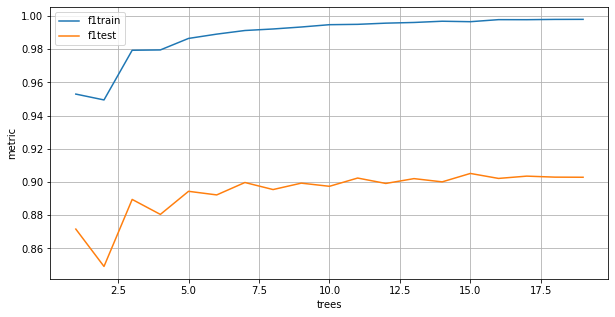

In [11]:
from sklearn.metrics import f1_score,confusion_matrix,accuracy_score

estimators_range = np.arange(1, 20, 1) 
f1_train=[]
f1_test=[]
for tree in estimators_range:
    forest = RandomForestClassifier(n_estimators=tree)
    forest.fit(X_train,y_train)
    y_pred=forest.predict(X_test)
    y_pred_train=forest.predict(X_train)
    f1_test.append(f1_score(y_test,y_pred))
    f1_train.append(f1_score(y_train,y_pred_train))
graph(estimators_range,f1_train,f1_test,"trees")
best_num_of_trees=estimators_range[f1_test.index(max(f1_test))]
print("Best number of trees is ",best_num_of_trees)
model = RandomForestClassifier(n_estimators=best_num_of_trees) 
model.fit(X_train, y_train)
confusion_matrix = confusion_matrix(y_test, model.predict(X_test)) 
pd.DataFrame(data  =  confusion_matrix,  columns  =  ['predicted  income<50', 
'predicted income>50'], index = ['actual income<50', 'actual income>50'])

<h3>П6.Обучить модель градиентного бустинга для задачи классификации</h3> 

В отличие от случайного леса, который создает дерево решений для каждой выборки, в градиентном бустинге деревья создаются последовательно. Предыдущие деревья в модели не изменяются. Результаты предыдущего дерева используются для улучшения последующего, т.еобучение нового алгоритма осуществляется на тех объектах, где предыдущие ошиблись чаще(большие веса объектов) 

Best number of trees is  17


,predicted income<50,predicted income>50
actual income<50,1469,887
actual income>50,409,7004


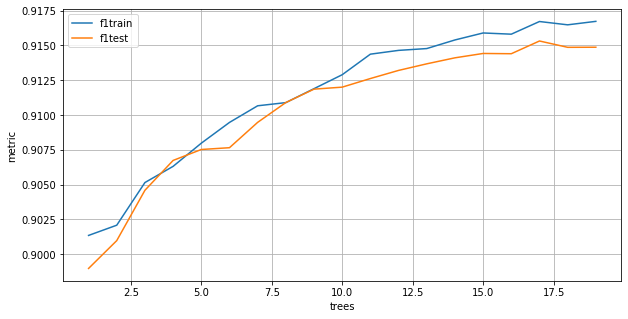

In [12]:

from sklearn.metrics import f1_score,confusion_matrix,accuracy_score

estimators_range = np.arange(1, 20, 1) 
f1_train=[]
f1_test=[]
for tree in estimators_range:
    boost = CatBoostClassifier(n_estimators=tree,verbose=False)
    boost.fit(X_train,y_train)
    y_pred=boost.predict(X_test)
    y_pred_train=boost.predict(X_train)
    f1_test.append(f1_score(y_test,y_pred))
    f1_train.append(f1_score(y_train,y_pred_train))
graph(estimators_range,f1_train,f1_test,"trees")
best_num_of_trees=estimators_range[f1_test.index(max(f1_test))]
print("Best number of trees is ",best_num_of_trees)
model = CatBoostClassifier(n_estimators=best_num_of_trees,verbose=False) 
model.fit(X_train, y_train)
confusion_matrix = confusion_matrix(y_test, model.predict(X_test)) 
pd.DataFrame(data  =  confusion_matrix,  
             columns  =  ['predicted  income<50',
            'predicted income>50'], index = ['actual income<50', 'actual income>50'])


<h3>П7.1. Обучение модели многослойного перцепторна, подготовка данных.</h3> 

In [26]:
scaler=StandardScaler()
X=scaler.fit_transform(X)
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.3, shuffle=True)
y_train = np_utils.to_categorical(y_train, 2)
y_test = np_utils.to_categorical(y_test, 2)
# X_train=X_train.to_numpy(dtype='float32')
# X_test = X_test.to_numpy(dtype='float32')


<h3>П7.2. Обучение модели многослойного перцепторна. Обучить модель многослойного перцептрона для задачи
классификации с оптимальными параметрами.</h3> 

In [21]:
epochs= np.arange(1, 20, 1) 
train=[]
test=[]
for ep in epochs:
    y_train = np_utils.to_categorical(y_train, 2)
    y_test = np_utils.to_categorical(y_test, 2)

    NB_CLASSES = y_train.shape[1].
    INPUT_SHAPE = (X_train.shape[1],)
    model = Sequential()
    model.add(Dense(32, input_shape=INPUT_SHAPE))
    model.add(Activation('relu'))
    model.add(Dropout(0.3))
    model.add(Dense(16))
    model.add(Activation('relu'))
    model.add(Dense(8))
    model.add(Activation('relu'))
    model.add(Dense(NB_CLASSES))
    model.add(Activation('softmax'))
    model.summary()
    model.compile(loss='binary_crossentropy',optimizer = 'adam',metrics=['Precision', 'Recall'])
    history = model.fit(X_train, y_train, batch_size = 32, epochs = ep, verbose = 1, validation_data = (X_test, y_test))
    f1_score_list_train = []
    f1_score_list_test = []
    for i in range(ep):
        f1_score_list_train.append(2*history.history['precision'][i]*history.history['recall'][i]/
                                   (history.history['precision'][i]+history.history['recall'][i]))
        f1_score_list_test.append(2*history.history['val_precision'][i]*history.history['val_recall'][i]/
                                  (history.history['val_precision'][i]+history.history['val_recall'][i]))
    test.append(np.mean(f1_score_list_test))
    train.append(np.mean(f1_score_list_train))
    X = data.drop(columns=['income'])
    y = data['income']
    scaler=StandardScaler()
    X=scaler.fit_transform(X)
    X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.3, shuffle=True)


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 32)                480       
_________________________________________________________________
activation_8 (Activation)    (None, 32)                0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 16)                528       
_________________________________________________________________
activation_9 (Activation)    (None, 16)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 8)                 136       
_________________________________________________________________
activation_10 (Activation)   (None, 8)                

713/713 [==============================] - 2s 2ms/step - loss: 0.3845 - precision: 0.8148 - recall: 0.8148 - val_loss: 0.3285 - val_precision: 0.8469 - val_recall: 0.8469
Epoch 2/5
713/713 [==============================] - 1s 2ms/step - loss: 0.3324 - precision: 0.8440 - recall: 0.8440 - val_loss: 0.3222 - val_precision: 0.8508 - val_recall: 0.8508
Epoch 3/5
713/713 [==============================] - 1s 2ms/step - loss: 0.3252 - precision: 0.8499 - recall: 0.8499 - val_loss: 0.3231 - val_precision: 0.8503 - val_recall: 0.8503
Epoch 4/5
713/713 [==============================] - 1s 2ms/step - loss: 0.3222 - precision: 0.8471 - recall: 0.8471 - val_loss: 0.3196 - val_precision: 0.8535 - val_recall: 0.8535
Epoch 5/5
713/713 [==============================] - 1s 2ms/step - loss: 0.3200 - precision: 0.8487 - recall: 0.8487 - val_loss: 0.3194 - val_precision: 0.8558 - val_recall: 0.8558
Model: "sequential_7"
_________________________________________________________________
Layer (type)     

Epoch 3/8
713/713 [==============================] - 1s 2ms/step - loss: 0.3271 - precision: 0.8456 - recall: 0.8456 - val_loss: 0.3259 - val_precision: 0.8467 - val_recall: 0.8467
Epoch 4/8
713/713 [==============================] - 1s 2ms/step - loss: 0.3201 - precision: 0.8502 - recall: 0.8502 - val_loss: 0.3273 - val_precision: 0.8437 - val_recall: 0.8437
Epoch 5/8
713/713 [==============================] - 1s 2ms/step - loss: 0.3172 - precision: 0.8520 - recall: 0.8520 - val_loss: 0.3236 - val_precision: 0.8457 - val_recall: 0.8457
Epoch 6/8
713/713 [==============================] - 1s 2ms/step - loss: 0.3164 - precision: 0.8537 - recall: 0.8537 - val_loss: 0.3237 - val_precision: 0.8471 - val_recall: 0.8471
Epoch 7/8
713/713 [==============================] - 1s 2ms/step - loss: 0.3141 - precision: 0.8541 - recall: 0.8541 - val_loss: 0.3226 - val_precision: 0.8487 - val_recall: 0.8487
Epoch 8/8
713/713 [==============================] - 1s 2ms/step - loss: 0.3125 - precision: 0.

713/713 [==============================] - 2s 2ms/step - loss: 0.3679 - precision: 0.8264 - recall: 0.8264 - val_loss: 0.3319 - val_precision: 0.8444 - val_recall: 0.8444
Epoch 2/11
713/713 [==============================] - 1s 2ms/step - loss: 0.3330 - precision: 0.8423 - recall: 0.8423 - val_loss: 0.3246 - val_precision: 0.8509 - val_recall: 0.8509
Epoch 3/11
713/713 [==============================] - 1s 2ms/step - loss: 0.3253 - precision: 0.8475 - recall: 0.8475 - val_loss: 0.3193 - val_precision: 0.8521 - val_recall: 0.8521
Epoch 4/11
713/713 [==============================] - 1s 2ms/step - loss: 0.3240 - precision: 0.8479 - recall: 0.8479 - val_loss: 0.3208 - val_precision: 0.8507 - val_recall: 0.8507
Epoch 5/11
713/713 [==============================] - 1s 2ms/step - loss: 0.3227 - precision: 0.8489 - recall: 0.8489 - val_loss: 0.3195 - val_precision: 0.8529 - val_recall: 0.8529
Epoch 6/11
713/713 [==============================] - 1s 2ms/step - loss: 0.3183 - precision: 0.8516 

713/713 [==============================] - 1s 2ms/step - loss: 0.3185 - precision: 0.8506 - recall: 0.8506 - val_loss: 0.3126 - val_precision: 0.8534 - val_recall: 0.8534
Epoch 8/15
713/713 [==============================] - 1s 2ms/step - loss: 0.3174 - precision: 0.8529 - recall: 0.8529 - val_loss: 0.3172 - val_precision: 0.8508 - val_recall: 0.8508
Epoch 9/15
713/713 [==============================] - 1s 2ms/step - loss: 0.3176 - precision: 0.8521 - recall: 0.8521 - val_loss: 0.3144 - val_precision: 0.8528 - val_recall: 0.8528
Epoch 10/15
713/713 [==============================] - 1s 2ms/step - loss: 0.3157 - precision: 0.8523 - recall: 0.8523 - val_loss: 0.3135 - val_precision: 0.8537 - val_recall: 0.8537
Epoch 11/15
713/713 [==============================] - 1s 2ms/step - loss: 0.3147 - precision: 0.8532 - recall: 0.8532 - val_loss: 0.3149 - val_precision: 0.8518 - val_recall: 0.8518
Epoch 12/15
713/713 [==============================] - 1s 2ms/step - loss: 0.3130 - precision: 0.85

713/713 [==============================] - 1s 2ms/step - loss: 0.3272 - precision: 0.8443 - recall: 0.8443 - val_loss: 0.3122 - val_precision: 0.8568 - val_recall: 0.8568
Epoch 5/17
713/713 [==============================] - 1s 2ms/step - loss: 0.3249 - precision: 0.8467 - recall: 0.8467 - val_loss: 0.3107 - val_precision: 0.8568 - val_recall: 0.8568
Epoch 6/17
713/713 [==============================] - 1s 2ms/step - loss: 0.3229 - precision: 0.8474 - recall: 0.8474 - val_loss: 0.3085 - val_precision: 0.8591 - val_recall: 0.8591
Epoch 7/17
713/713 [==============================] - 1s 2ms/step - loss: 0.3204 - precision: 0.8492 - recall: 0.8492 - val_loss: 0.3079 - val_precision: 0.8587 - val_recall: 0.8587
Epoch 8/17
713/713 [==============================] - 1s 2ms/step - loss: 0.3202 - precision: 0.8489 - recall: 0.8489 - val_loss: 0.3077 - val_precision: 0.8588 - val_recall: 0.8588
Epoch 9/17
713/713 [==============================] - 1s 2ms/step - loss: 0.3192 - precision: 0.8485 

713/713 [==============================] - 2s 2ms/step - loss: 0.3925 - precision: 0.8063 - recall: 0.8063 - val_loss: 0.3388 - val_precision: 0.8394 - val_recall: 0.8394
Epoch 2/19
713/713 [==============================] - 1s 2ms/step - loss: 0.3395 - precision: 0.8395 - recall: 0.8395 - val_loss: 0.3291 - val_precision: 0.8460 - val_recall: 0.8460
Epoch 3/19
713/713 [==============================] - 1s 2ms/step - loss: 0.3291 - precision: 0.8472 - recall: 0.8472 - val_loss: 0.3231 - val_precision: 0.8493 - val_recall: 0.8493
Epoch 4/19
713/713 [==============================] - 1s 2ms/step - loss: 0.3225 - precision: 0.8507 - recall: 0.8507 - val_loss: 0.3203 - val_precision: 0.8498 - val_recall: 0.8498
Epoch 5/19
713/713 [==============================] - 1s 2ms/step - loss: 0.3203 - precision: 0.8505 - recall: 0.8505 - val_loss: 0.3176 - val_precision: 0.8510 - val_recall: 0.8510
Epoch 6/19
713/713 [==============================] - 1s 2ms/step - loss: 0.3183 - precision: 0.8520 

Best number of epochs is  17


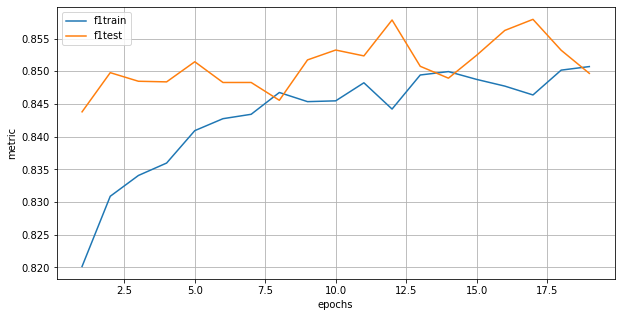

In [22]:
graph(epochs,train,test, 'epochs')
best_num_of_epochs=epochs[test.index(max(test))]
print("Best number of epochs is ",best_num_of_epochs)

In [27]:
from sklearn.metrics import f1_score,confusion_matrix
moddel=neuron_summary(X_train,y_train)

model.compile(loss='binary_crossentropy',optimizer = 'adam',metrics=['Precision', 'Recall'])

model.fit(X_train, y_train, batch_size = 32, epochs = best_num_of_epochs, verbose = 1, validation_data = (X_test, y_test))
y_pred = model.predict_classes(X_test)

confusion_matrix = confusion_matrix(np.argmax(y_test, axis=1), y_pred) 
pd.DataFrame(data  =  confusion_matrix,  columns  =  ['predicted  income<50', 
'predicted income>50'], index = ['actual income<50', 'actual income>50'])

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_88 (Dense)             (None, 32)                480       
_________________________________________________________________
activation_88 (Activation)   (None, 32)                0         
_________________________________________________________________
dropout_22 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_89 (Dense)             (None, 16)                528       
_________________________________________________________________
activation_89 (Activation)   (None, 16)                0         
_________________________________________________________________
dense_90 (Dense)             (None, 8)                 136       
_________________________________________________________________
activation_90 (Activation)   (None, 8)               

,predicted income<50,predicted income>50
actual income<50,1407,969
actual income>50,418,6975


<h3>П8.1 Catboost для MNIST</h3> 


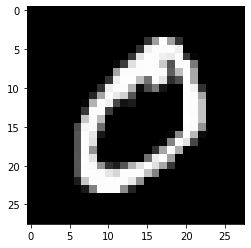

Best number of trees is  19
Learning rate set to 0.5
0:	learn: 1.3693570	total: 2.91s	remaining: 52.3s
1:	learn: 1.0041482	total: 5.78s	remaining: 49.1s
2:	learn: 0.7919847	total: 8.65s	remaining: 46.1s
3:	learn: 0.6832921	total: 11.6s	remaining: 43.6s
4:	learn: 0.5967622	total: 14.3s	remaining: 40.2s
5:	learn: 0.5364910	total: 17s	remaining: 36.8s
6:	learn: 0.4757513	total: 19.7s	remaining: 33.7s
7:	learn: 0.4431876	total: 22.3s	remaining: 30.7s
8:	learn: 0.4002160	total: 25s	remaining: 27.8s
9:	learn: 0.3750498	total: 27.6s	remaining: 24.9s
10:	learn: 0.3547074	total: 30.3s	remaining: 22s
11:	learn: 0.3350013	total: 33s	remaining: 19.2s
12:	learn: 0.3207390	total: 35.6s	remaining: 16.4s
13:	learn: 0.3029606	total: 38.5s	remaining: 13.7s
14:	learn: 0.2869101	total: 41.3s	remaining: 11s
15:	learn: 0.2747568	total: 44.4s	remaining: 8.33s
16:	learn: 0.2609327	total: 47.5s	remaining: 5.58s
17:	learn: 0.2451569	total: 50.6s	remaining: 2.81s
18:	learn: 0.2384110	total: 53.6s	remaining: 0us


,0,1,2,3,4,5,6,7,8,9
0,947,0,6,0,0,7,8,2,7,3
1,0,1114,2,3,1,5,1,1,8,0
2,5,6,939,14,5,5,11,15,28,4
3,4,4,18,905,1,29,0,14,27,8
4,0,6,10,2,887,2,11,6,9,49
5,12,5,0,22,5,807,14,2,18,7
6,15,4,3,0,14,24,888,1,8,1
7,3,11,24,5,8,3,0,942,5,27
8,6,7,10,20,8,17,9,4,879,14
9,5,3,7,14,33,8,3,17,15,904


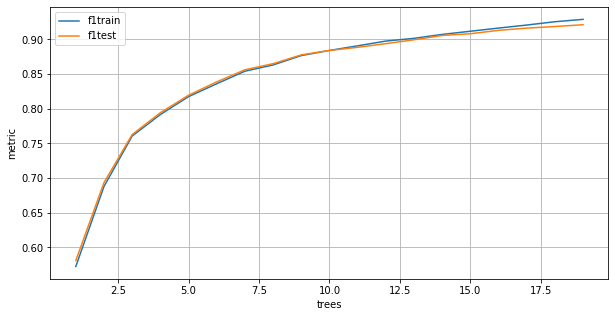

In [28]:
from sklearn.metrics import f1_score,confusion_matrix,accuracy_score

(X_train_mnist, y_train_mnist), (X_test_mnist, y_test_mnist) = mnist.load_data()
sample = 1
image = X_train_mnist[sample]
# plot the sample
fig = plt.figure
plt.imshow(image, cmap='gray')
plt.show()
X_train_mnist = X_train_mnist.reshape(X_train_mnist.shape[0], 28*28)
X_test_mnist = X_test_mnist.reshape(X_test_mnist.shape[0], 28*28)
estimators_range = np.arange(1, 20, 1) 
f1_train=[]
f1_test=[]
for tree in estimators_range:
    boost = CatBoostClassifier(n_estimators=tree,verbose=False)
    boost.fit(X_train_mnist,y_train_mnist)
    y_pred=boost.predict(X_test_mnist)
    y_pred_train=boost.predict(X_train_mnist)
    f1_test.append(f1_score(y_test_mnist, boost.predict(X_test_mnist), average='micro'))
    f1_train.append(f1_score(y_train_mnist, boost.predict(X_train_mnist), average='micro'))
graph(estimators_range,f1_train,f1_test,"trees")
best_num_of_trees=estimators_range[f1_test.index(max(f1_test))]
print("Best number of trees is ",best_num_of_trees)
model = CatBoostClassifier(n_estimators=best_num_of_trees) 
model.fit(X_train_mnist, y_train_mnist)

confusion_matrix = confusion_matrix(y_test_mnist, model.predict(X_test_mnist)) 
pd.DataFrame(data = confusion_matrix, columns = ['0', '1', '2', '3', '4',
'5', '6', '7', '8', '9'], index = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])

<h3>П8.2 Нейросеть для MNIST</h3> 


In [3]:
(X_train_mnist, y_train_mnist), (X_test_mnist, y_test_mnist) = mnist.load_data()
X_train_mnist = X_train_mnist.reshape(X_train_mnist.shape[0], 28*28)
X_test_mnist = X_test_mnist.reshape(X_test_mnist.shape[0], 28*28)
y_train_mnist = np_utils.to_categorical(y_train_mnist, 10)
y_test_mnist = np_utils.to_categorical(y_test_mnist, 10)
epochs= np.arange(1, 10, 1) 
train=[]
test=[]о
for ep in epochs:
    NB_CLASSES = y_train_mnist.shape[1]
    INPUT_SHAPE = (X_train_mnist.shape[1],)
    model = Sequential()
    model.add(Dense(32, input_shape=INPUT_SHAPE))
    model.add(Activation('relu'))
    model.add(Dropout(0.3))
    model.add(Dense(16))
    model.add(Activation('relu'))
    model.add(Dense(8))
    model.add(Activation('relu'))
    model.add(Dense(NB_CLASSES))
    model.add(Activation('softmax'))
    model.summary()
    model.compile(loss='categorical_crossentropy',optimizer = 'adam',metrics=['Accuracy','Precision', 'Recall'])
    history = model.fit(X_train_mnist, y_train_mnist, batch_size = 32, epochs = ep, verbose = 1, 
                        validation_data = (X_test_mnist, y_test_mnist))
    f1_score_list_train = []
    f1_score_list_test = []
    for i in range(ep):
        f1_score_list_train.append(2*history.history['precision'][i]*history.history['recall'][i]/
                                   (history.history['precision'][i]+history.history['recall'][i]))
        f1_score_list_test.append(2*history.history['val_precision'][i]*history.history['val_recall'][i]/
                                  (history.history['val_precision'][i]+history.history['val_recall'][i]))
    test.append(np.mean(f1_score_list_test))
    train.append(np.mean(f1_score_list_train))

(784,)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                25120     
_________________________________________________________________
activation (Activation)      (None, 32)                0         
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 16)                528       
_________________________________________________________________
activation_1 (Activation)    (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 136       
_________________________________________________________________
activation_2 (Activation)    (None, 8)           

Epoch 4/4
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8267 - accuracy: 0.0024 - precision: 0.8782 - recall: 0.6009 - val_loss: 0.5040 - val_accuracy: 2.9000e-04 - val_precision: 0.9386 - val_recall: 0.7550
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 32)                25120     
_________________________________________________________________
activation_16 (Activation)   (None, 32)                0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_17 (Dense)             (None, 16)                528       
_________________________________________________________________
activation_17 (Activation)   (None, 16)                0         
_______________________

Epoch 5/7
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8760 - accuracy: 0.0033 - precision: 0.8883 - recall: 0.5690 - val_loss: 0.5091 - val_accuracy: 9.0000e-05 - val_precision: 0.9486 - val_recall: 0.7468
Epoch 6/7
1875/1875 [==============================] - 3s 2ms/step - loss: 0.7965 - accuracy: 6.5833e-04 - precision: 0.8874 - recall: 0.6265 - val_loss: 0.4325 - val_accuracy: 3.0000e-05 - val_precision: 0.9396 - val_recall: 0.8236
Epoch 7/7
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7491 - accuracy: 4.9833e-04 - precision: 0.8810 - recall: 0.6708 - val_loss: 0.4176 - val_accuracy: 0.0000e+00 - val_precision: 0.9395 - val_recall: 0.8357
Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 32)                25120     
_________________________________________________________________
activation_28 (Acti

Best number of epochs is  8
Model: "sequential_49"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_196 (Dense)            (None, 32)                25120     
_________________________________________________________________
activation_196 (Activation)  (None, 32)                0         
_________________________________________________________________
dropout_49 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_197 (Dense)            (None, 16)                528       
_________________________________________________________________
activation_197 (Activation)  (None, 16)                0         
_________________________________________________________________
dense_198 (Dense)            (None, 8)                 136       
_________________________________________________________________
activation_198 (Activatio

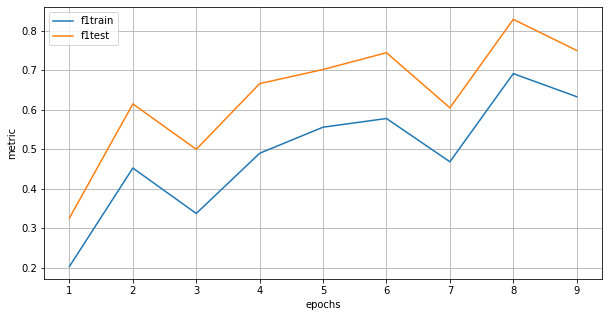

In [37]:
graph(epochs,train,test, 'epochs')
best_num_of_epochs=epochs[test.index(max(test))]
print("Best number of epochs is ",best_num_of_epochs)
neuron_summary(X_train_mnist,y_train_mnist)
model.compile(loss='categorical_crossentropy',optimizer = 'adam',metrics=['Accuracy','Precision', 'Recall'])
model.fit(X_train_mnist, y_train_mnist, batch_size = 32,
          epochs = best_num_of_epochs, verbose = 1, validation_data = (X_test_mnist, y_test_mnist))

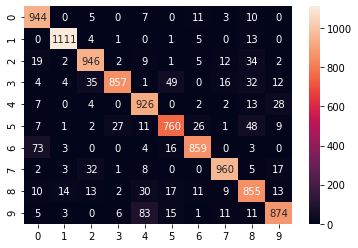

In [38]:
from sklearn.metrics import f1_score,confusion_matrix
y_pred = model.predict_classes(X_test_mnist)
confusion_matrix_ = confusion_matrix(np.argmax(y_test_mnist,axis=-1), y_pred)
cm = pd.DataFrame(data = confusion_matrix_, columns = ['0', '1', '2', '3', '4',
'5', '6', '7', '8', '9'], index = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])
ax = sns.heatmap(cm, annot=True, fmt="d")

<h3>Вывод</h3> 
В работе была проанализирована работа решающих дереввьев, случайного леса и град.бустинга для задачи классификации. Были выбраны по f1 мере оптимальные параметры для данных алгоритмов и построены матрицы ошибок. Можно сказать, что град.бустинг показал наилучший результат с увеличением кол-ва дереввьем, чем случайный лес.

В работе была создана 4х слойная НС. Данная модель показывает хорошее качество по угадыванию цифр, что видно на матрице ошибок. Была проанализировавна f1-мера от количества эпох.